In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set()

In [2]:
p_info = pd.read_csv('participants_data.csv')

In [3]:
#MR
summary = pd.DataFrame()
for pid in p_info['pid']:
    data = pd.read_csv('result/' + pid + '_MR.csv', index_col=0)
    summary = summary.append(data)

In [4]:
summary.groupby(['condition', 'timing'], as_index=False, sort=None).mean()

,condition,timing,view,angle,response,RT
0,continuous,pre,1,150,0.907407,1.901395
1,continuous,post,1,150,0.930556,1.147693
2,control,pre,1,150,0.909722,1.457933


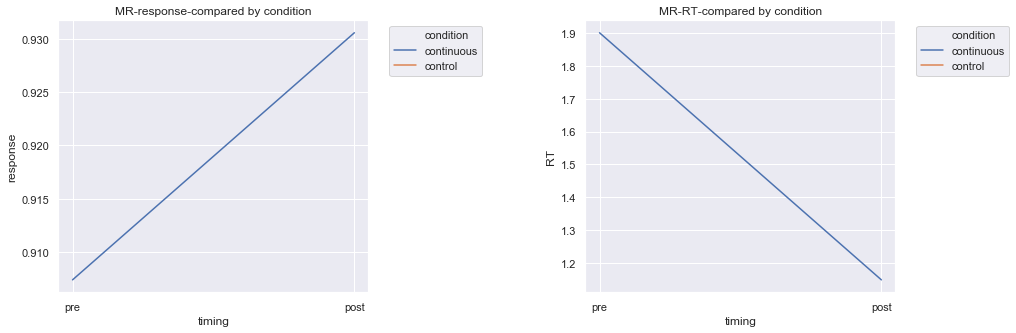

In [5]:
#groupby condition
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
data = summary.groupby(['condition', 'timing'], as_index=False, sort=None).mean()
for i, value in enumerate(['response', 'RT']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y=value, hue='condition', sort=False, ci='sd', data=data)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MR-' + value + '-compared by condition')

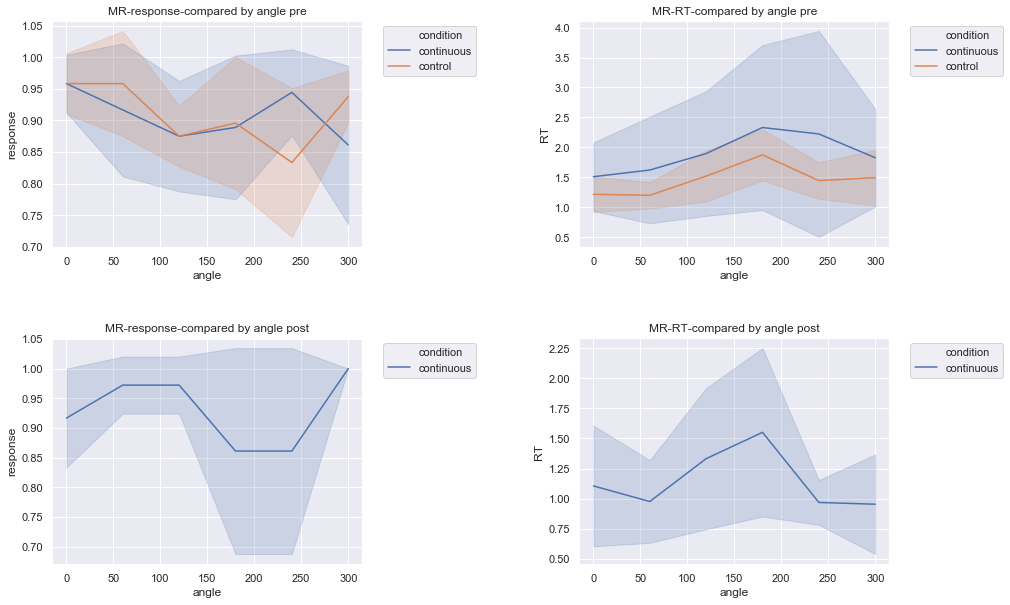

In [6]:
#groupby angle
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.7, hspace=0.4)
data = summary.groupby(['pid', 'condition', 'timing', 'angle'], as_index=False, sort=None).mean()
for i, (timing, value) in enumerate(itertools.product(['pre', 'post'], ['response', 'RT'])):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='angle', y=value, hue='condition', ci='sd', data=data[data.timing == timing])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MR-' + value + '-compared by angle ' + timing)

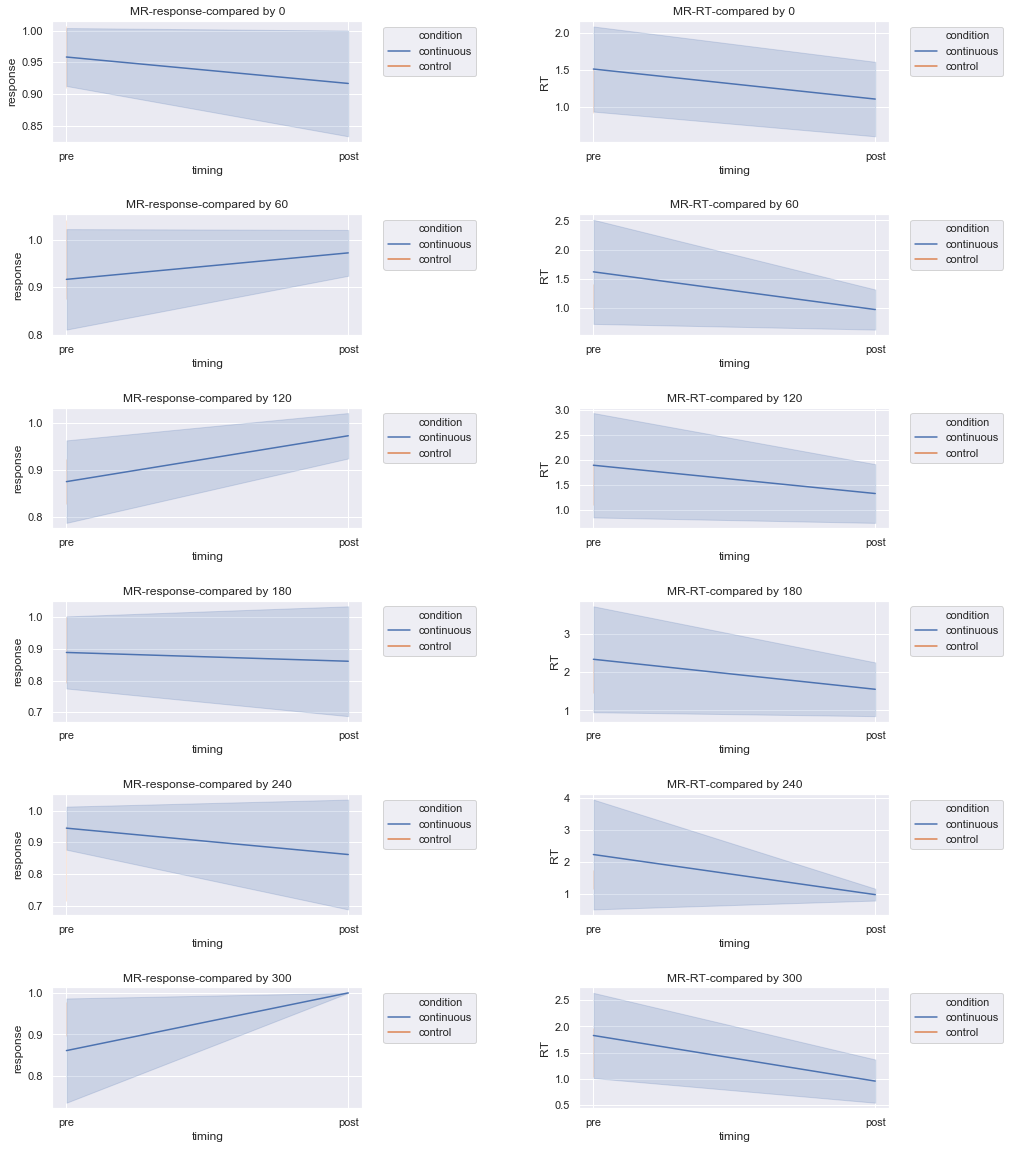

In [7]:
#compared by angle
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.7, hspace=0.6)
data = summary.groupby(['pid', 'condition', 'timing', 'angle'], as_index=False, sort=None).mean()
for i, (angle, value) in enumerate(itertools.product(range(0,301,60), ['response', 'RT'])):
    plt.subplot(6, 2, i+1)
    sns.lineplot(x='timing', y=value, hue='condition', sort=False, ci='sd', data=data[data.angle == angle])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MR-' + value + '-compared by ' + str(angle))

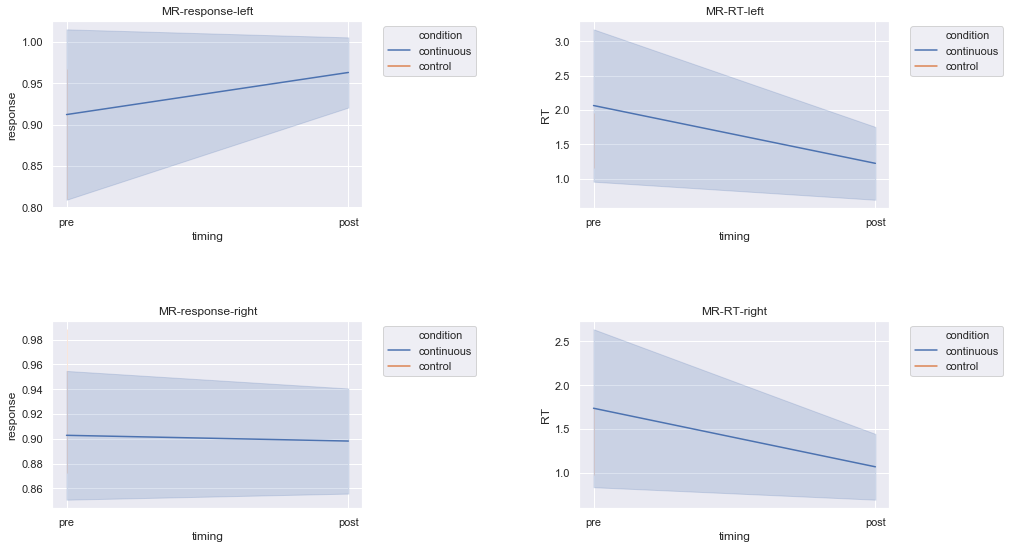

In [8]:
#compare between hand
plt.figure(figsize=(15, 20))
plt.subplots_adjust(wspace=0.7, hspace=0.6)
data = summary.groupby(['pid', 'condition', 'timing', 'hand'], as_index=False, sort=None).mean()
for i, (hand, value) in enumerate(itertools.product(['left', 'right'], ['response', 'RT'])):
    plt.subplot(4, 2, i+1)
    sns.lineplot(x='timing', y=value, hue='condition', sort=False, ci='sd', data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MR-' + value + '-' + hand)